In [1]:
# import all of the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load the dataset 
# Observe the first five rows
game = pd.read_csv(r"C:\Users\visha\Downloads\Video_Games_Sales_as_at_22_Dec_2016.csv")
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# determine the dimensions of the dataset
game.shape

(16719, 16)

In [4]:
# types of data being analyzed
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
# check for null values 
game.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# drop the mull values
game = game.dropna(how='any')
game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [7]:
# check again for null values
game.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [8]:
# check for any duplicate values
game.duplicated().sum()

0

In [9]:
# determine the dimensions again
game.shape

(6825, 16)

In [10]:
# basic descriptive statistics
game.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6825.0,2007.436777,4.211248,1985.00,2004.00,2007.00,2011.00,2016.00
NA_Sales,6825.0,0.394484,0.967385,0.00,0.06,0.15,0.39,41.36
EU_Sales,6825.0,0.236089,0.687330,0.00,0.02,0.06,0.21,28.96
JP_Sales,6825.0,0.064158,0.287570,0.00,0.00,0.00,0.01,6.50
Other_Sales,6825.0,0.082677,0.269871,0.00,0.01,0.02,0.07,10.57
Global_Sales,6825.0,0.777590,1.963443,0.01,0.11,0.29,0.75,82.53
Critic_Score,6825.0,70.272088,13.868572,13.00,62.00,72.00,80.00,98.00
Critic_Count,6825.0,28.931136,19.224165,3.00,14.00,25.00,39.00,113.00
User_Score,6825.0,7.185626,1.439942,0.50,6.50,7.50,8.20,9.60
User_Count,6825.0,174.722344,587.428538,4.00,11.00,27.00,89.00,10665.00


In [11]:
game.describe(include = 'object')

,Name,Platform,Genre,Publisher,Developer,Rating
count,6825,6825,6825,6825,6825,6825
unique,4377,17,12,263,1289,7
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,EA Canada,T
freq,8,1140,1630,944,149,2377


In [12]:
# count the values of the platform column
game['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [13]:
# count the values of the genre column
game['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [14]:
# count the values of the Rating column
game['Rating'].value_counts()

T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: Rating, dtype: int64

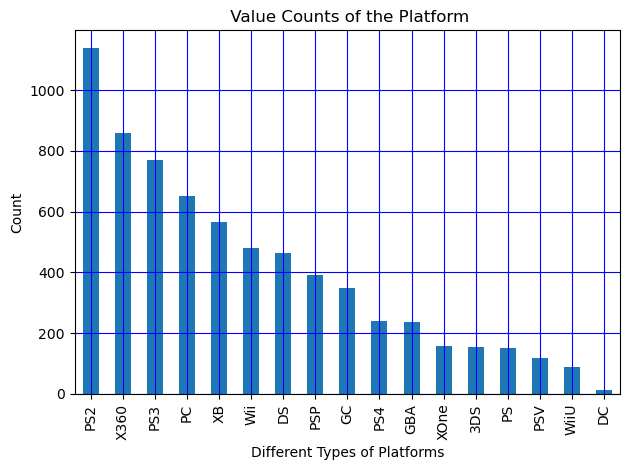

In [15]:
# plot the counted values of the platform
game['Platform'].value_counts().plot(kind="bar")
plt.title(" Value Counts of the Platform")
plt.xlabel("Different Types of Platforms")
plt.ylabel("Count")
plt.grid(True, color = "blue")
plt.tight_layout()
plt.show()

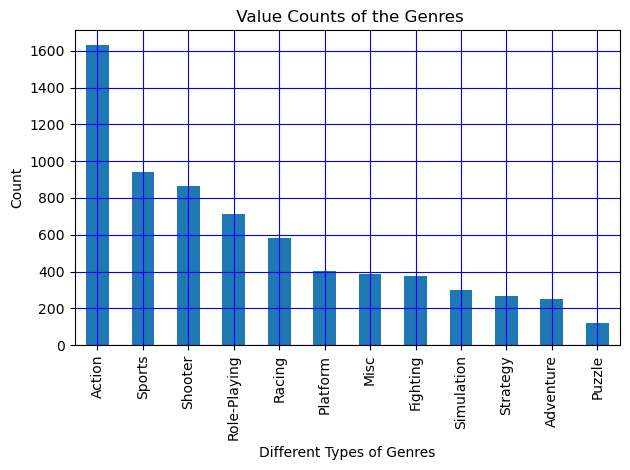

In [16]:
# plot the counted values of the genres
game['Genre'].value_counts().plot(kind="bar")
plt.title(" Value Counts of the Genres")
plt.xlabel("Different Types of Genres")
plt.ylabel("Count")
plt.grid(True,color = "blue")
plt.tight_layout()
plt.show()

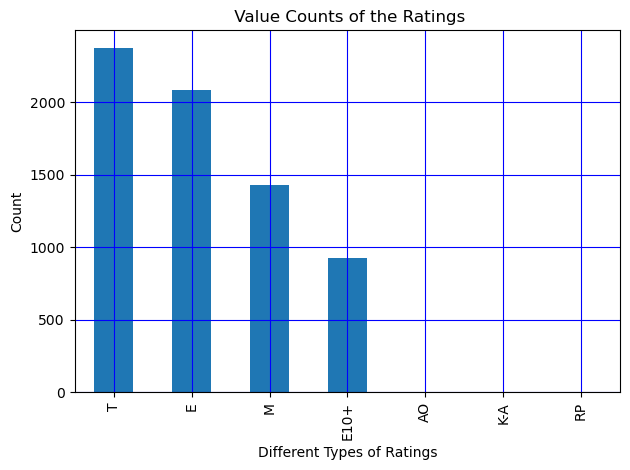

In [17]:
# plot the counted values of ratings column
game['Rating'].value_counts().plot(kind="bar")
plt.title(" Value Counts of the Ratings")
plt.xlabel("Different Types of Ratings")
plt.ylabel("Count")
plt.grid(True,color = "blue")
plt.tight_layout()
plt.show()

In [18]:
# correlation of the dataset
game.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.016239,0.041346,-0.038443,0.042315,0.006661,-0.007661,0.203336,-0.253914,0.199348
NA_Sales,-0.016239,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.085796,0.246208
EU_Sales,0.041346,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.055915,0.283504
JP_Sales,-0.038443,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.127521,0.072773
Other_Sales,0.042315,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.057083,0.240085
Global_Sales,0.006661,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.088349,0.264151
Critic_Score,-0.007661,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.580318,0.265639
Critic_Count,0.203336,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.195087,0.365603
User_Score,-0.253914,0.085796,0.055915,0.127521,0.057083,0.088349,0.580318,0.195087,1.000000,0.017546
User_Count,0.199348,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,0.017546,1.000000


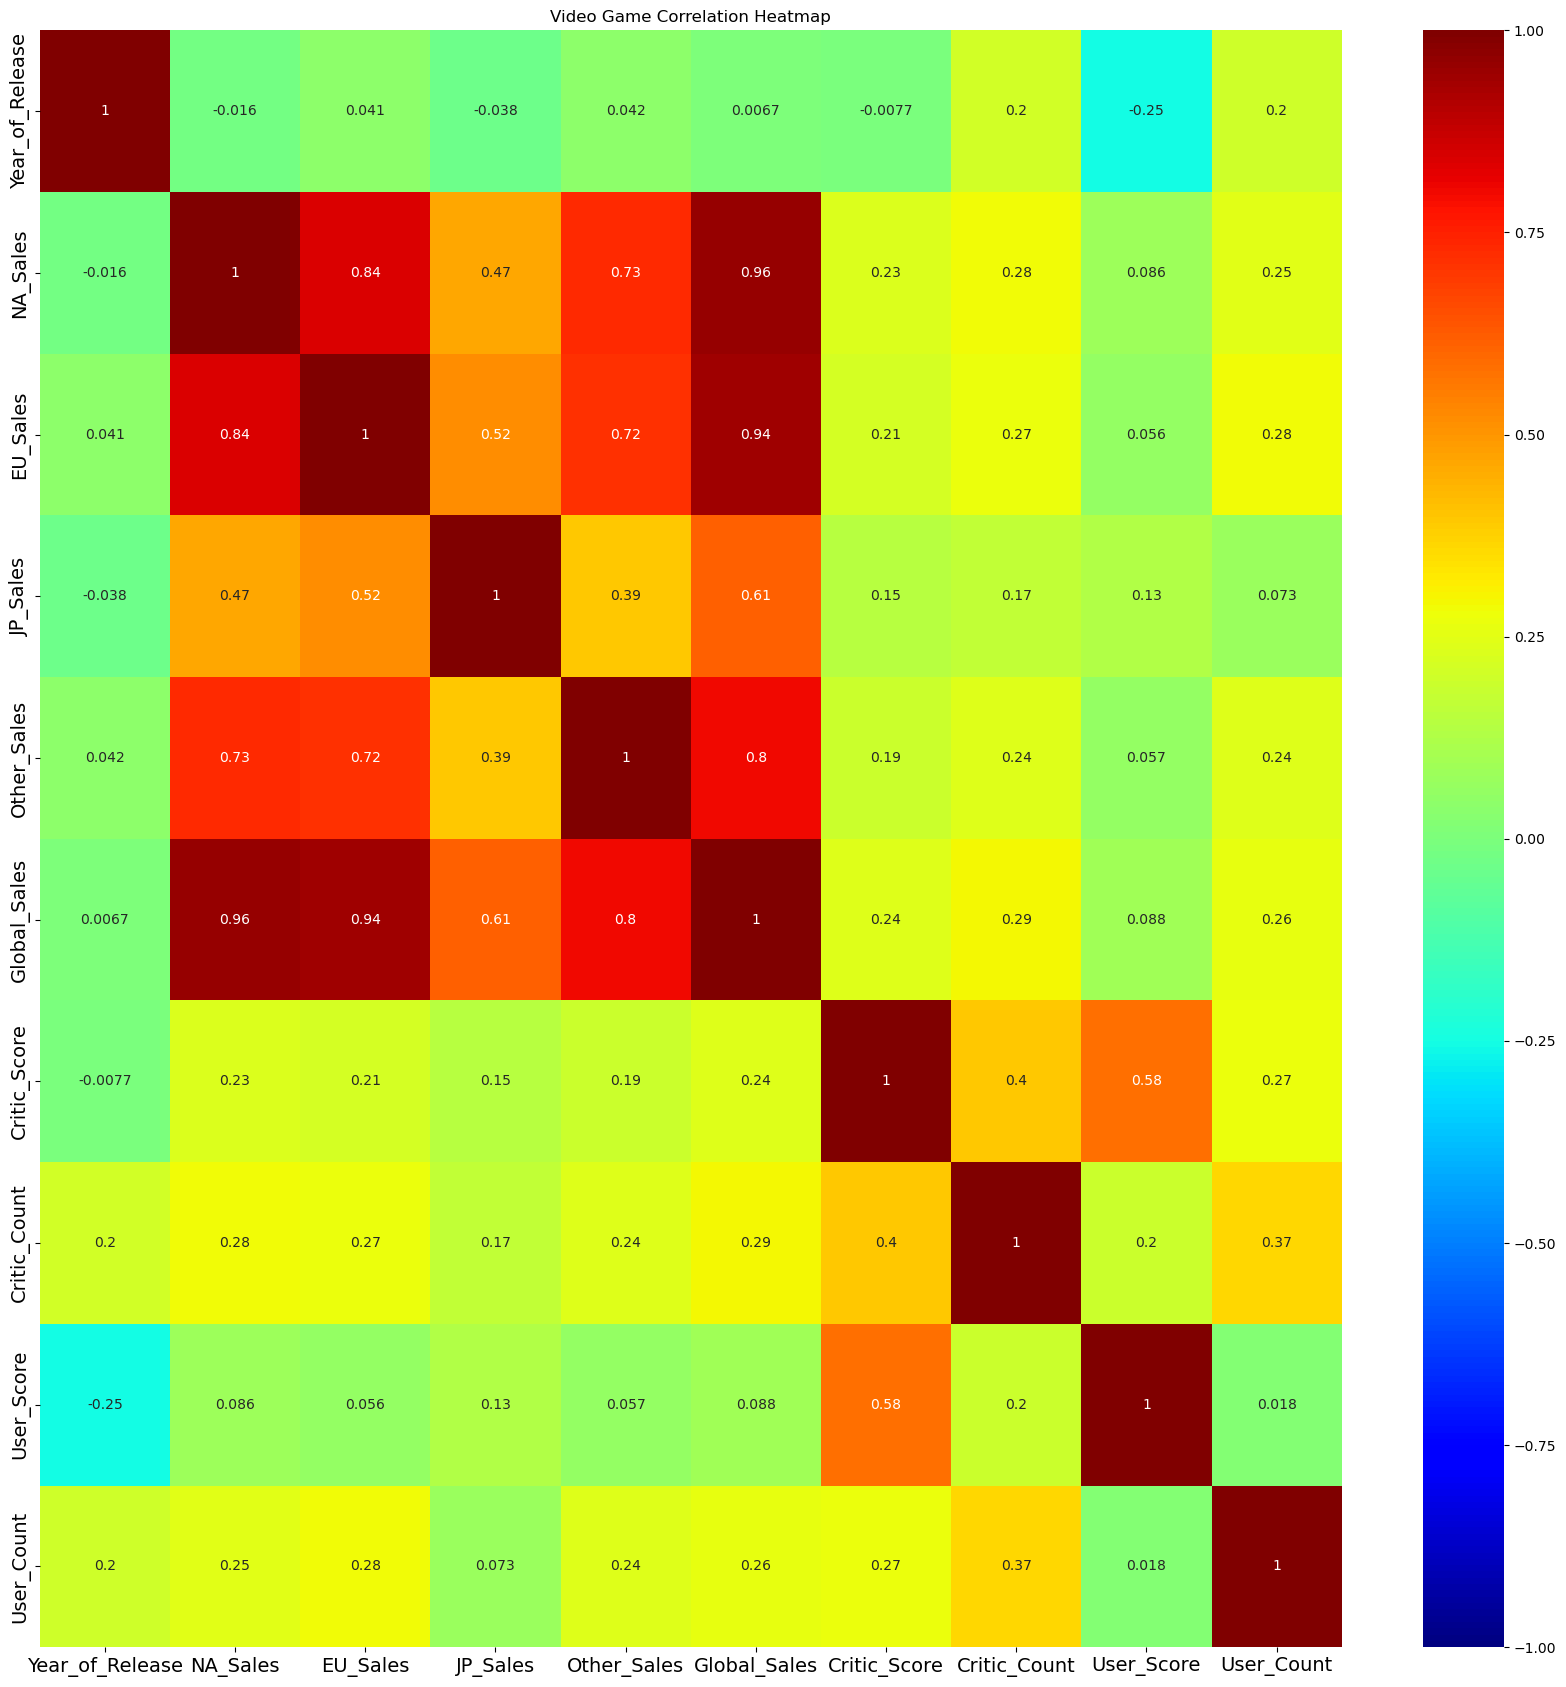

In [19]:
# create a heatmap of the correlation
plt.figure(figsize=(21,21))
s = sns.heatmap(game.corr(), annot=True, cmap='jet', vmin = -1, vmax = 1)
s.set_xticklabels(s.get_xticklabels(), rotation = 0, fontsize = 14)
s.set_yticklabels(s.get_yticklabels(), rotation = 90, fontsize = 14)
plt.title('Video Game Correlation Heatmap')
plt.show()

In [20]:
# Total number of different types of platforms in each region 
category_analysis = pd.DataFrame(game.groupby(['Platform'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum())
category_analysis

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
3DS,48.67,33.33,33.57,7.65,123.23
DC,1.54,0.29,2.66,0.06,4.55
DS,173.40,95.30,83.66,29.86,382.33
GBA,79.39,32.60,16.13,3.58,131.75
GC,107.93,30.93,16.12,4.27,159.42
PC,63.76,104.82,0.17,17.80,187.12
PS,91.76,64.58,38.85,11.46,206.55
PS2,472.65,255.14,75.81,142.41,945.97
PS3,341.62,273.50,54.52,114.81,784.30


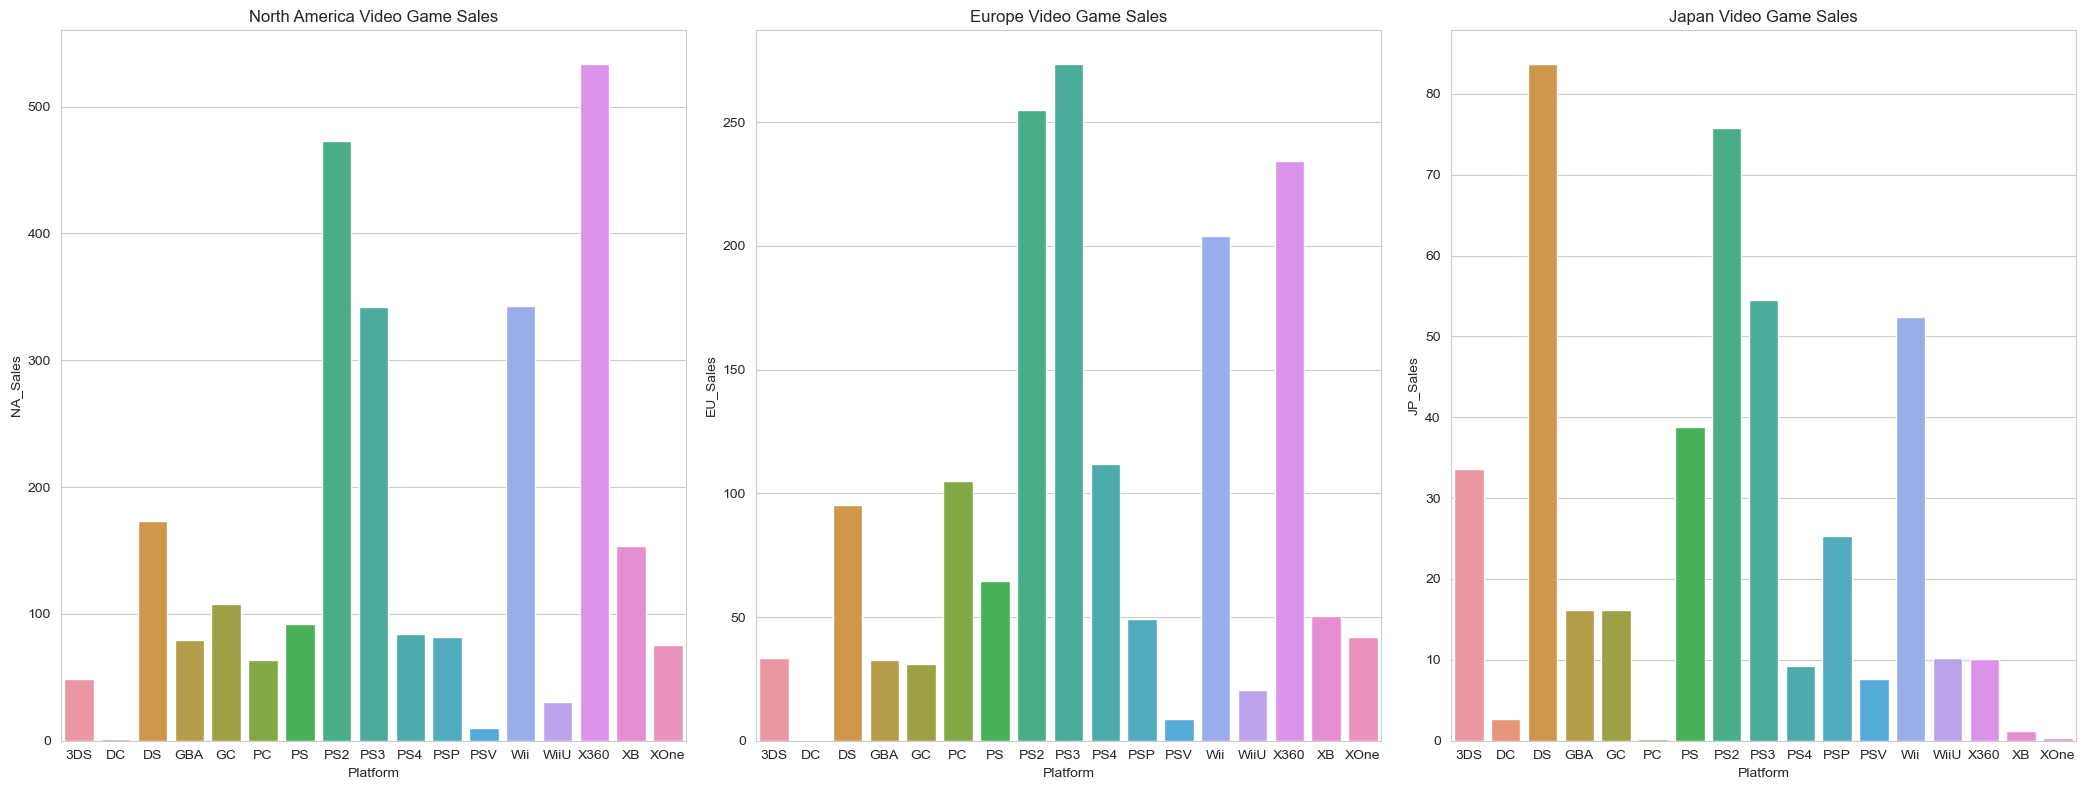

In [21]:
# plot the different types of platforms in North America, Europe, and Japan
sns.set_style("whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(21, 8))
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.NA_Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.EU_Sales, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.JP_Sales, ax=axis[2])
cat1.set(title = 'North America Video Game Sales')
cat2.set(title = 'Europe Video Game Sales')
cat3.set(title = 'Japan Video Game Sales')
figure.tight_layout()

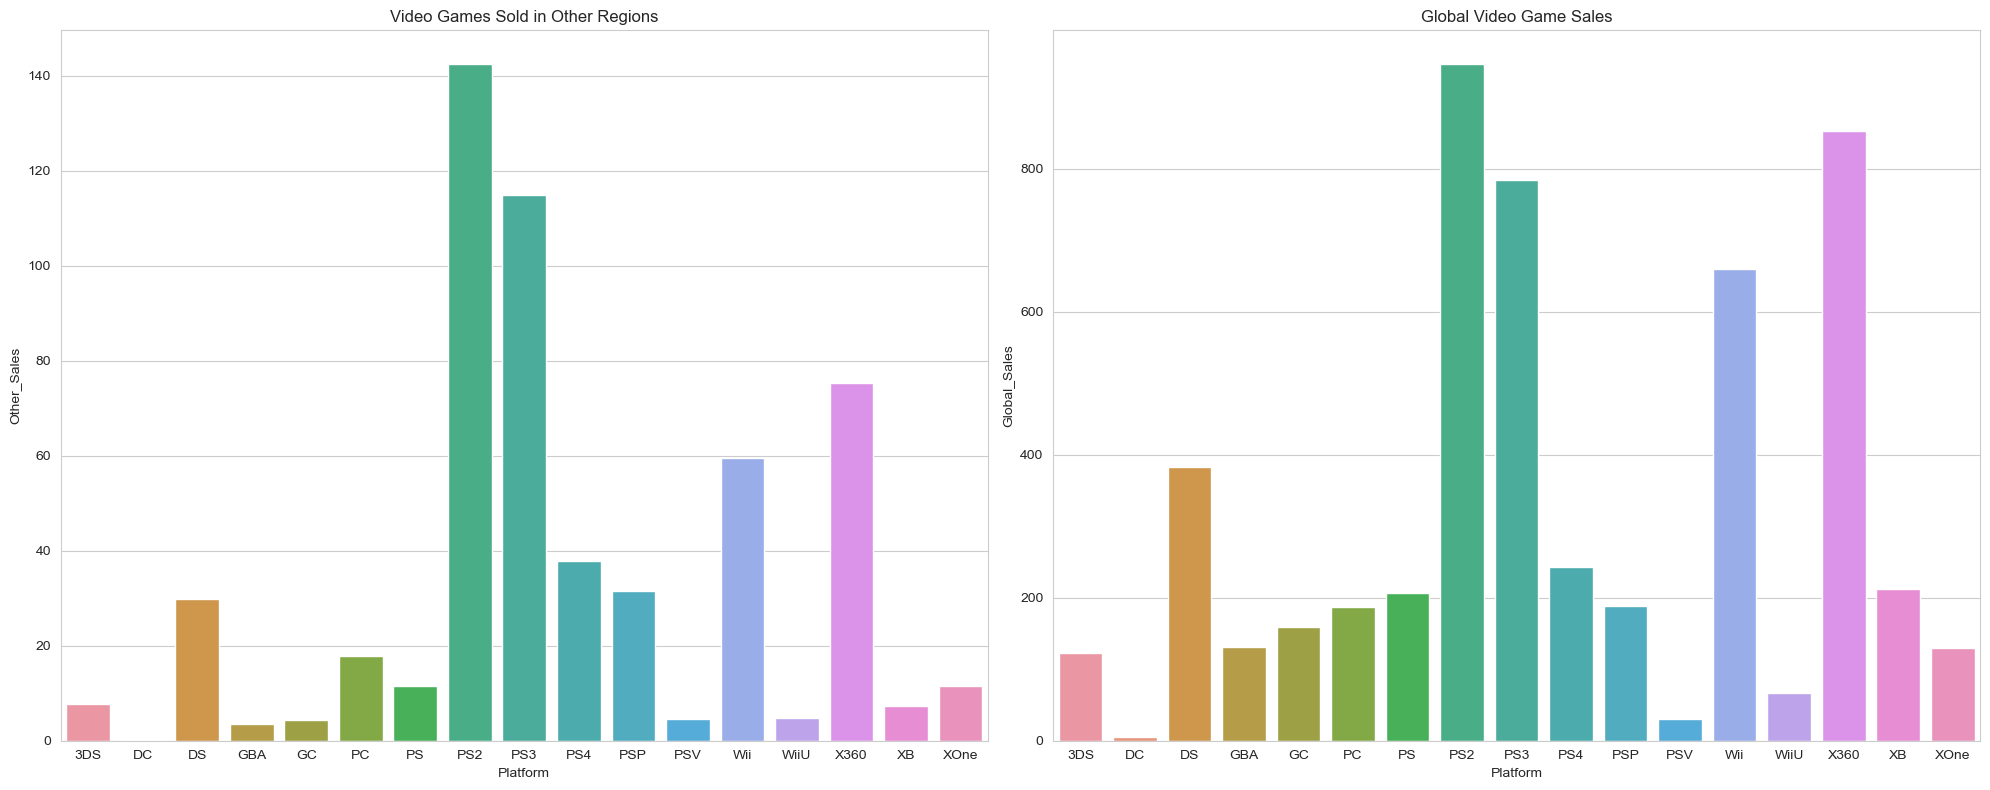

In [22]:
#plot the different types of platforms in other parts of the world including globally
sns.set_style("whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(20, 8))
cat4 = sns.barplot(x = category_analysis.index, y = category_analysis.Other_Sales,ax=axis[0])
cat5 = sns.barplot(x = category_analysis.index, y = category_analysis.Global_Sales,ax=axis[1])
cat4.set(title = 'Video Games Sold in Other Regions')
cat5.set(title = 'Global Video Game Sales')
figure.tight_layout()

In [23]:
# Total number of different types of genres in each region 
subcat_analysis = pd.DataFrame(game.groupby(['Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum())
subcat_analysis

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,591.23,387.78,76.17,147.46,1203.16
Adventure,38.81,25.06,8.73,8.05,80.75
Fighting,136.39,60.50,27.85,25.14,249.95
Misc,222.05,120.46,33.22,40.41,416.26
Platform,193.60,108.56,43.09,32.53,377.80
Puzzle,33.50,24.04,14.98,6.33,78.90
Racing,225.59,164.66,27.76,58.29,476.22
Role-Playing,219.53,119.20,122.47,40.36,501.37
Shooter,448.76,261.12,18.57,87.90,816.48


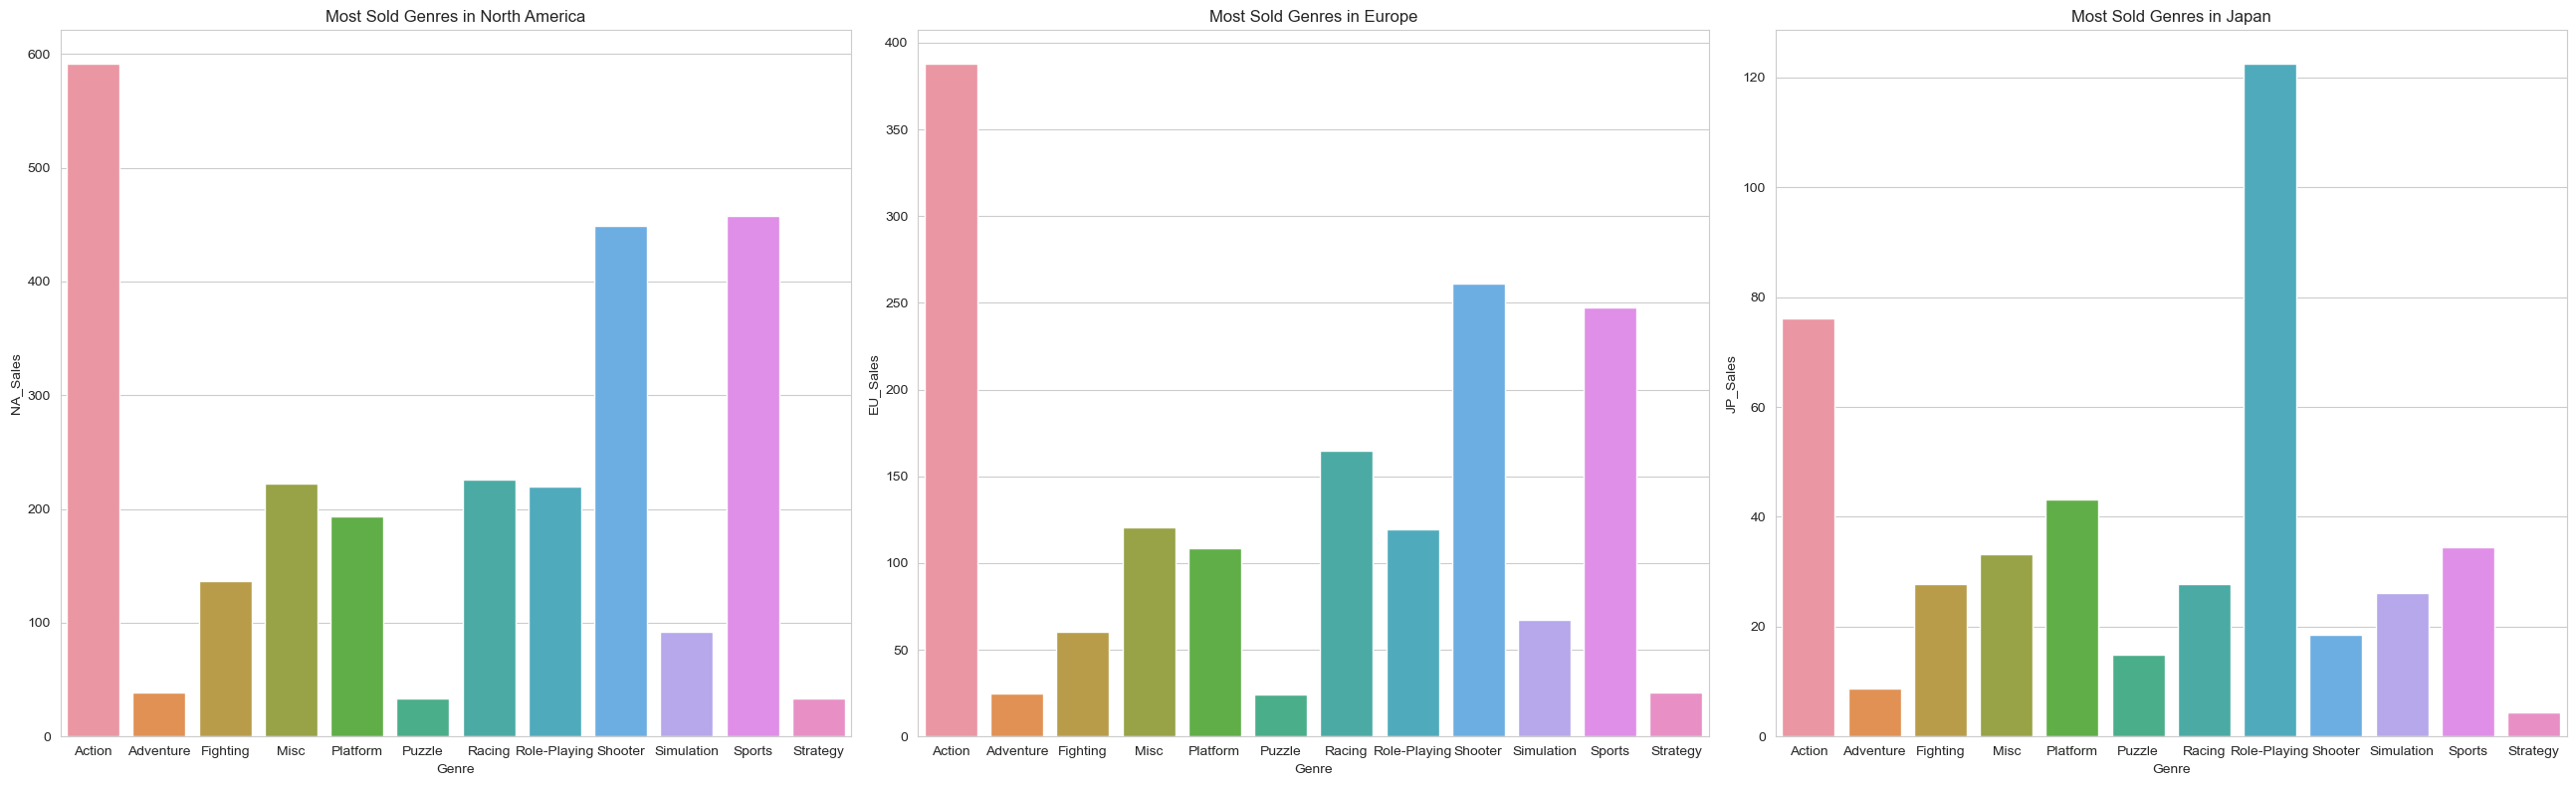

In [24]:
# plot the different types of genres in North America, Europe, and Japan
sns.set_style("whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(26, 8))
cat1 = sns.barplot(x = subcat_analysis.index, y = subcat_analysis.NA_Sales, ax=axis[0])
cat2 = sns.barplot(x = subcat_analysis.index, y = subcat_analysis.EU_Sales, ax=axis[1])
cat3 = sns.barplot(x = subcat_analysis.index, y = subcat_analysis.JP_Sales, ax=axis[2])
cat1.set(title = 'Most Sold Genres in North America')
cat2.set(title = 'Most Sold Genres in Europe')
cat3.set(title = 'Most Sold Genres in Japan')
figure.tight_layout()

[Text(0.5, 1.0, 'Global Video Game Sales')]

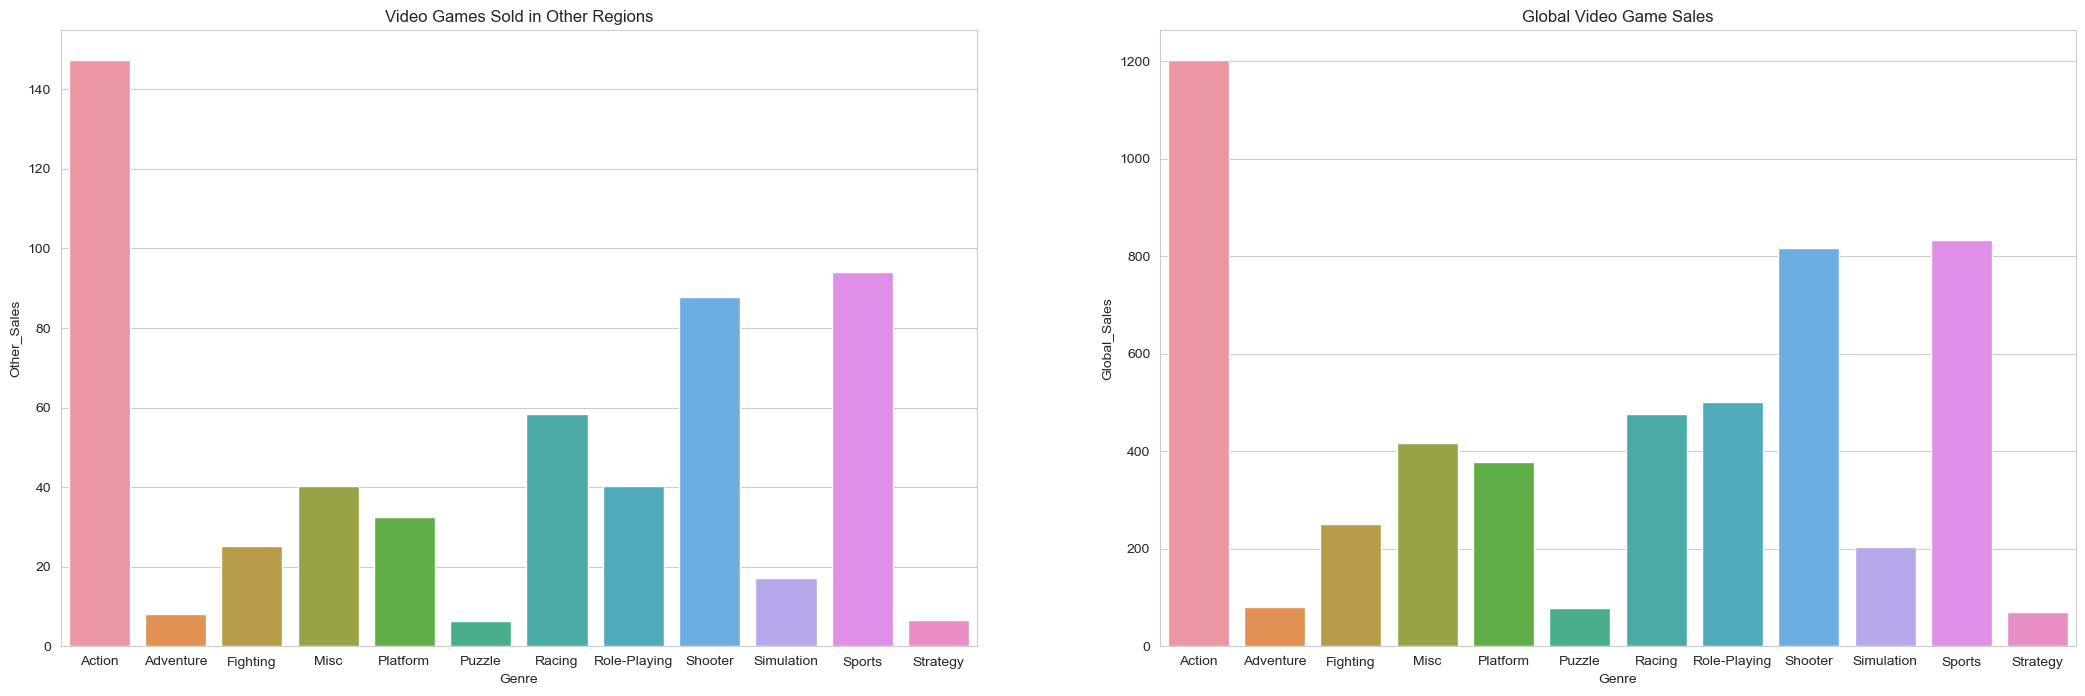

In [25]:
#plot the different types of genres in other parts of the world including globally
sns.set_style("whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(26, 8))
cat4 = sns.barplot(x = subcat_analysis.index, y = subcat_analysis.Other_Sales, ax=axis[0])
cat5 = sns.barplot(x = subcat_analysis.index, y = subcat_analysis.Global_Sales, ax=axis[1])
cat4.set(title = 'Video Games Sold in Other Regions')
cat5.set(title = 'Global Video Game Sales')

In [26]:
rating_analysis = pd.DataFrame(game.groupby(['Rating'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum())
rating_analysis

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rating,,,,,
AO,1.26,0.61,0.00,0.09,1.95
E,986.02,590.78,190.67,191.79,1959.50
E10+,286.03,155.94,38.81,59.60,540.55
K-A,0.26,0.16,1.46,0.03,1.92
M,724.61,467.07,62.28,171.74,1425.78
RP,0.00,0.03,0.00,0.01,0.03
T,694.17,396.72,144.66,141.01,1377.32


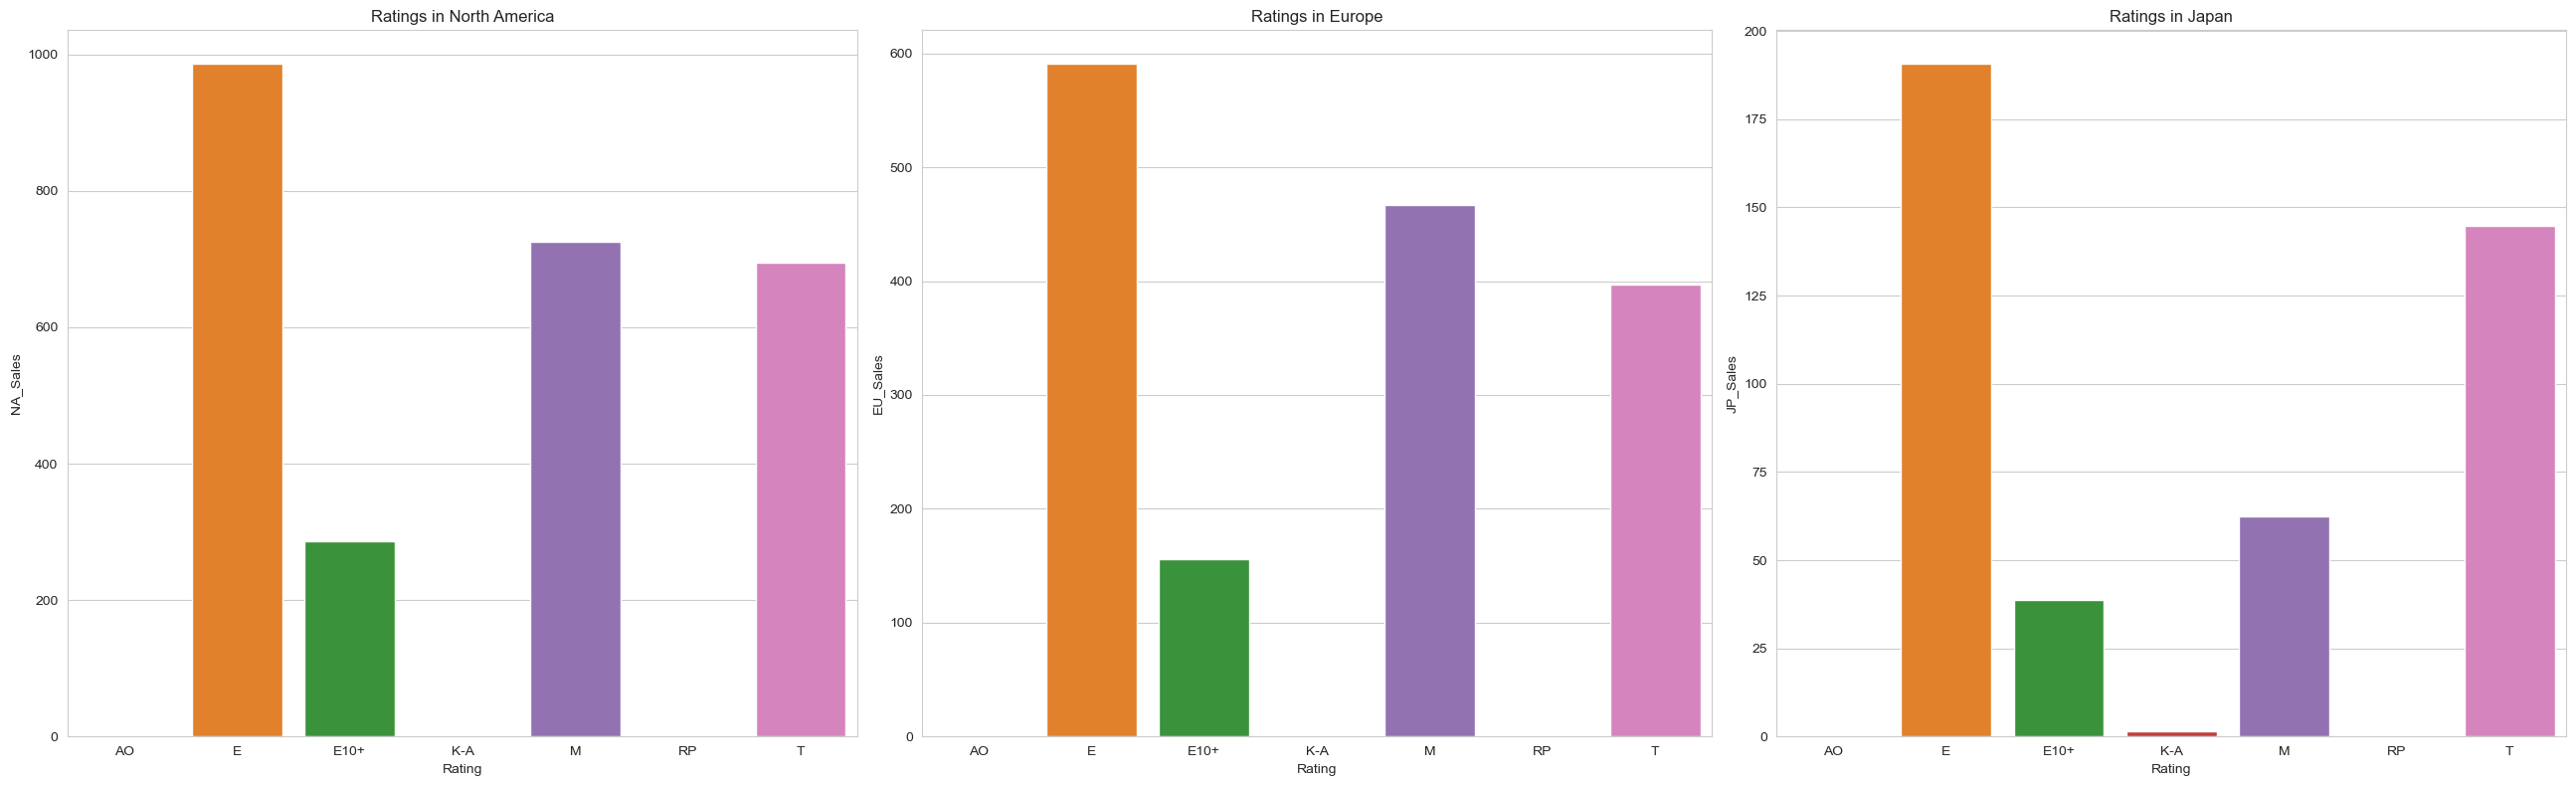

In [27]:
sns.set_style("whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(26, 8))
cat1 = sns.barplot(x = rating_analysis.index, y = rating_analysis.NA_Sales, ax=axis[0])
cat2 = sns.barplot(x = rating_analysis.index, y = rating_analysis.EU_Sales, ax=axis[1])
cat3 = sns.barplot(x = rating_analysis.index, y = rating_analysis.JP_Sales, ax=axis[2])
cat1.set(title = 'Ratings in North America')
cat2.set(title = 'Ratings in Europe')
cat3.set(title = 'Ratings in Japan')
figure.tight_layout()

[Text(0.5, 1.0, 'Ratings Globally')]

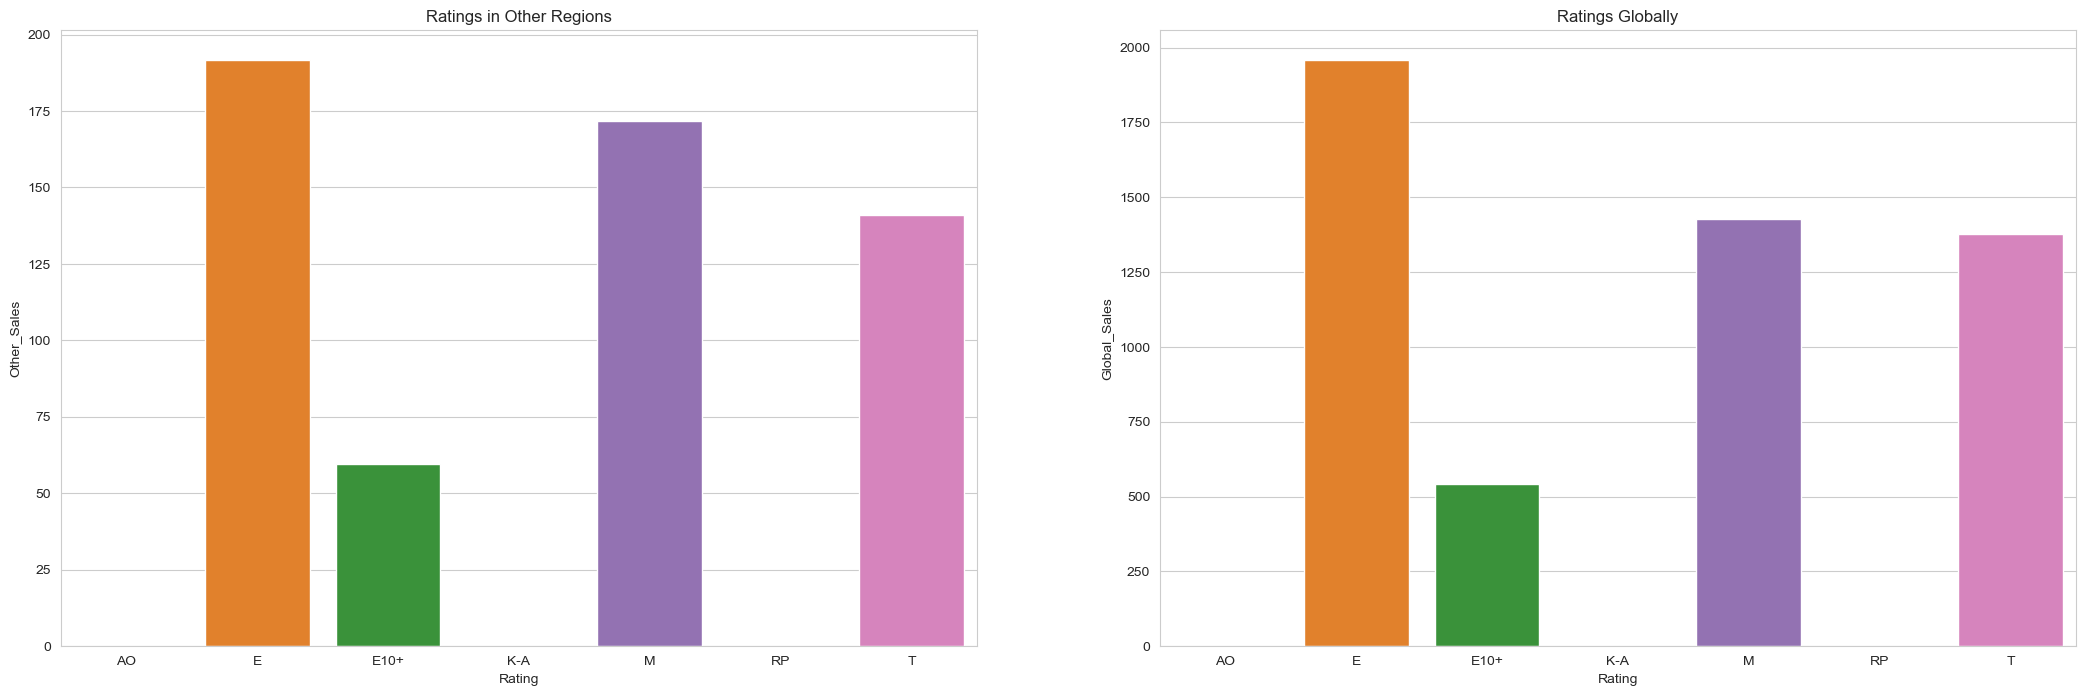

In [28]:
sns.set_style("whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(26, 8))
cat4 = sns.barplot(x = rating_analysis.index, y = rating_analysis.Other_Sales, ax=axis[0])
cat5 = sns.barplot(x = rating_analysis.index, y = rating_analysis.Global_Sales, ax=axis[1])
cat4.set(title = 'Ratings in Other Regions')
cat5.set(title = 'Ratings Globally')

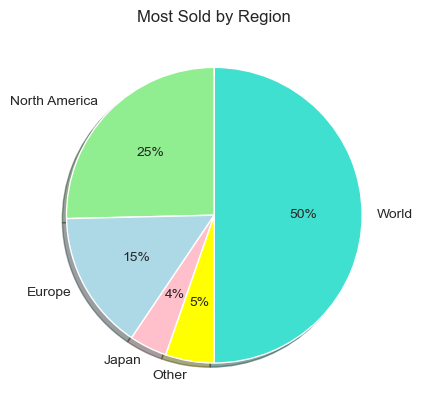

In [29]:
games = [game['NA_Sales'].sum(), game['EU_Sales'].sum(), game['JP_Sales'].sum(),
         game['Other_Sales'].sum(), game['Global_Sales'].sum()]

labels = ['North America','Europe','Japan','Other','World']
colors = ['lightgreen','lightblue','pink','yellow','turquoise']
explode =[0 , 0, 0, 0, 0]

plt.pie(games,startangle = 90, labels = labels, autopct = "%.0f%%", colors = colors, explode = explode, shadow = True)
plt.title("Most Sold by Region")
plt.show()        